In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U matplotlib

In [305]:
# Hash utilities
import zlib
from collections import Counter as count  
from string import printable  

# Create Hash Function
def crc32_hash_function(user_id: str) -> str:
    """Take string, even if its integer convert first to string"""
    return zlib.crc32(user_id.encode("utf-8"))

# Convert from str to hexadecimal
def to_hex(crc32encoded: str) -> hex:
    return hex(crc32encoded & 0xffffffff)

# Perform hash function to each item
def distribute(items, num_containers, hash_function = hash):  
    return count([hash_function(item) % num_containers for item in items])  

# Cli plotting
def plot(histogram):  
    for key in sorted(histogram):  
        count1 = histogram[key]  
        padding = (max(histogram.values()) - count1) * " "  
        print(f"{key:3} {'■' * count1}{padding} ({count1})")  

def plot_first_last(histogram):  
    length = len(histogram)
    for idx, key in enumerate(sorted(histogram)):  
        if idx == 0 or idx == 1 or idx == length-2 or idx == length-1:
            count1 = histogram[key]  
            padding = (max(histogram.values()) - count1) * " "  
            print(f"{key:3} {'■' * count1}{padding} ({count1})")  

bins = 5
print(f"{sys.hash_info.algorithm} hash function. {bins} containers.")
plot(distribute(printable, num_containers=bins))  

print(f"CRC32 hash function. {bins} containers.")
plot(distribute(printable, num_containers=bins, hash_function=crc32_hash_function))  

siphash24 hash function. 5 containers.
  0 ■■■■■■■■■■■■■■■■■         (17)
  1 ■■■■■■■■■■■■■■■■■■■■■     (21)
  2 ■■■■■■■■■■■■■■■■■■■■■■■■■ (25)
  3 ■■■■■■■■■■■■■■■■■■■■■     (21)
  4 ■■■■■■■■■■■■■■■■          (16)
CRC32 hash function. 5 containers.
  0 ■■■■■■■■■■■■■■■             (15)
  1 ■■■■■■■■■■■■■■■■■■■■        (20)
  2 ■■■■■■■■■■■■■■■■■■■         (19)
  3 ■■■■■■■■■■■■■■■■■■■■■■■■■■■ (27)
  4 ■■■■■■■■■■■■■■■■■■■         (19)


In [306]:
# low number test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(10)],   
[str(uuid.uuid4().int) for i in range(100)], 
[str(uuid.uuid4().int) for i in range(1000)] 
]

# Arbitrary bin sizes
num_bins = [5, 10, 20]

# Plot Normal hash function
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}")
        plot(distribute(val, num_containers=bin_size))  
        #hex_val = [to_hex(crc32_hash_function(str(i))) for i in val]  # Convert to hexadecimal


Python hash function results for random UUIDs
Case #0  Number of Bins: 5  Number of Elements: 10
  0 ■    (1)
  1 ■    (1)
  2 ■    (1)
  3 ■■■  (3)
  4 ■■■■ (4)
Case #0  Number of Bins: 10  Number of Elements: 10
  1 ■   (1)
  3 ■■  (2)
  4 ■   (1)
  5 ■   (1)
  7 ■   (1)
  8 ■   (1)
  9 ■■■ (3)
Case #0  Number of Bins: 20  Number of Elements: 10
  3 ■  (1)
  5 ■  (1)
  7 ■  (1)
  9 ■  (1)
 11 ■  (1)
 13 ■  (1)
 14 ■  (1)
 18 ■  (1)
 19 ■■ (2)
Case #1  Number of Bins: 5  Number of Elements: 100
  0 ■■■■■■■■■■■■■■■■■            (17)
  1 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■ (28)
  2 ■■■■■■■■■■■■■■               (14)
  3 ■■■■■■■■■■■■■■■■■■■          (19)
  4 ■■■■■■■■■■■■■■■■■■■■■■       (22)
Case #1  Number of Bins: 10  Number of Elements: 100
  0 ■■■■■           (5)
  1 ■■■■■■■■■■■■■   (13)
  2 ■■■■■■■■        (8)
  3 ■■■■■■          (6)
  4 ■■■■■■■■■■      (10)
  5 ■■■■■■■■■■■■    (12)
  6 ■■■■■■■■■■■■■■■ (15)
  7 ■■■■■■          (6)
  8 ■■■■■■■■■■■■■   (13)
  9 ■■■■■■■■■■■■    (12)
Case #1  N

Python hash function results for random UUIDs
Test case number: 1


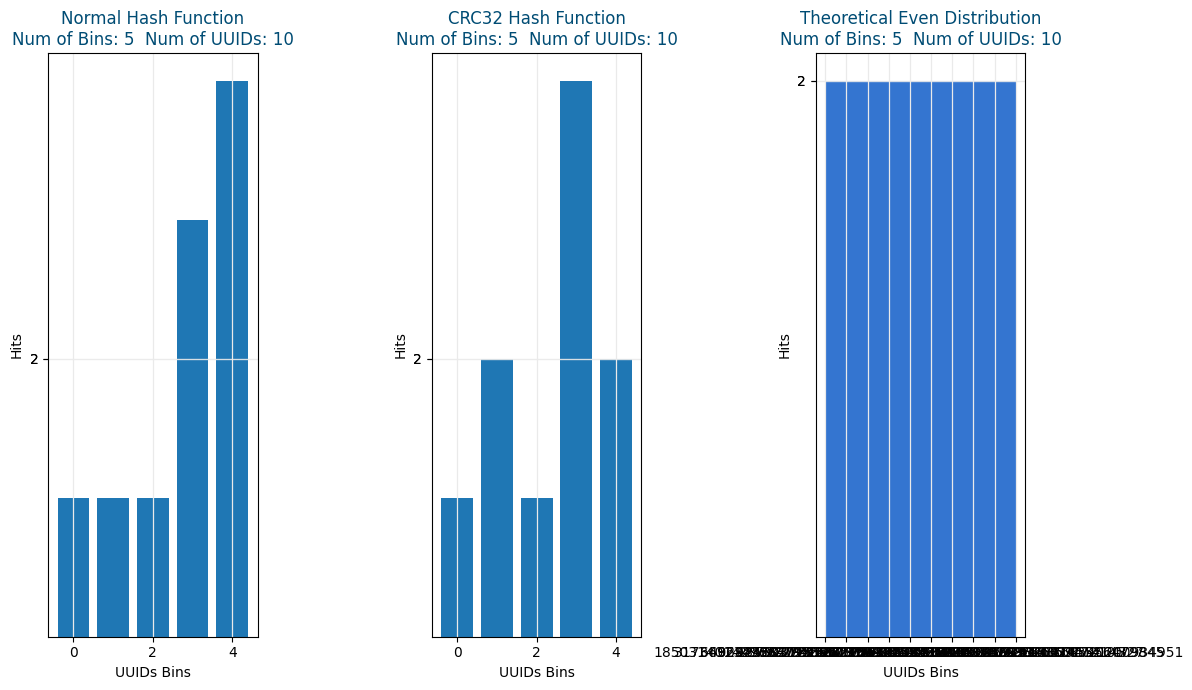

Test case number: 1


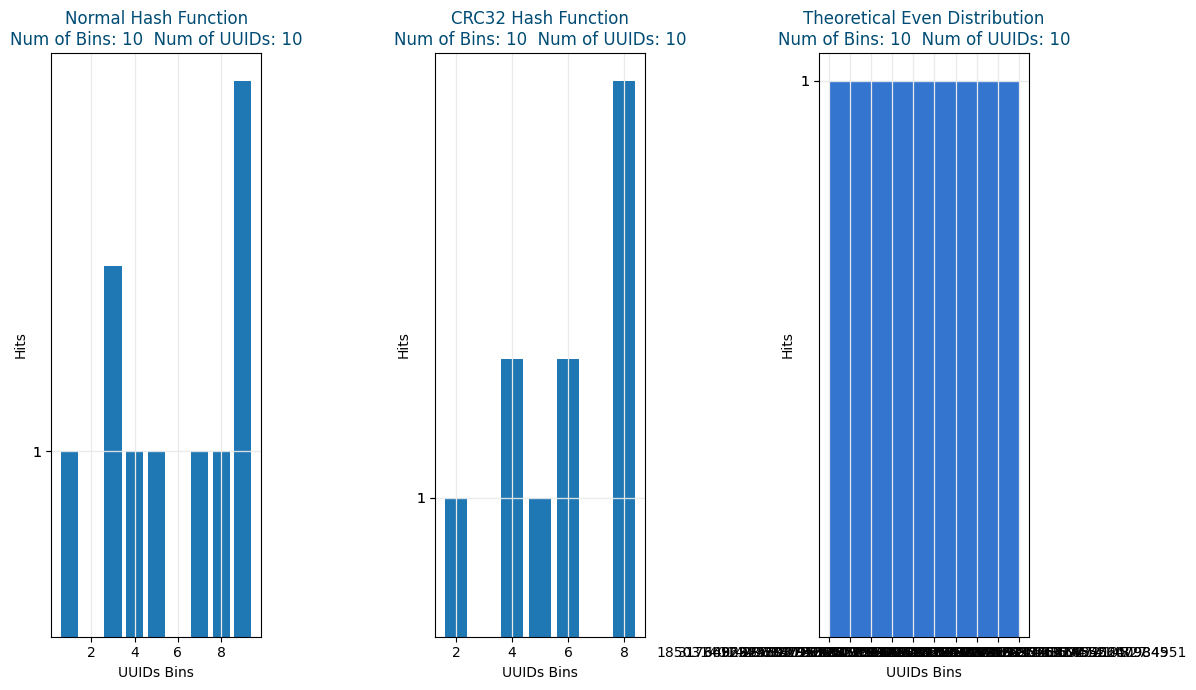

Test case number: 1


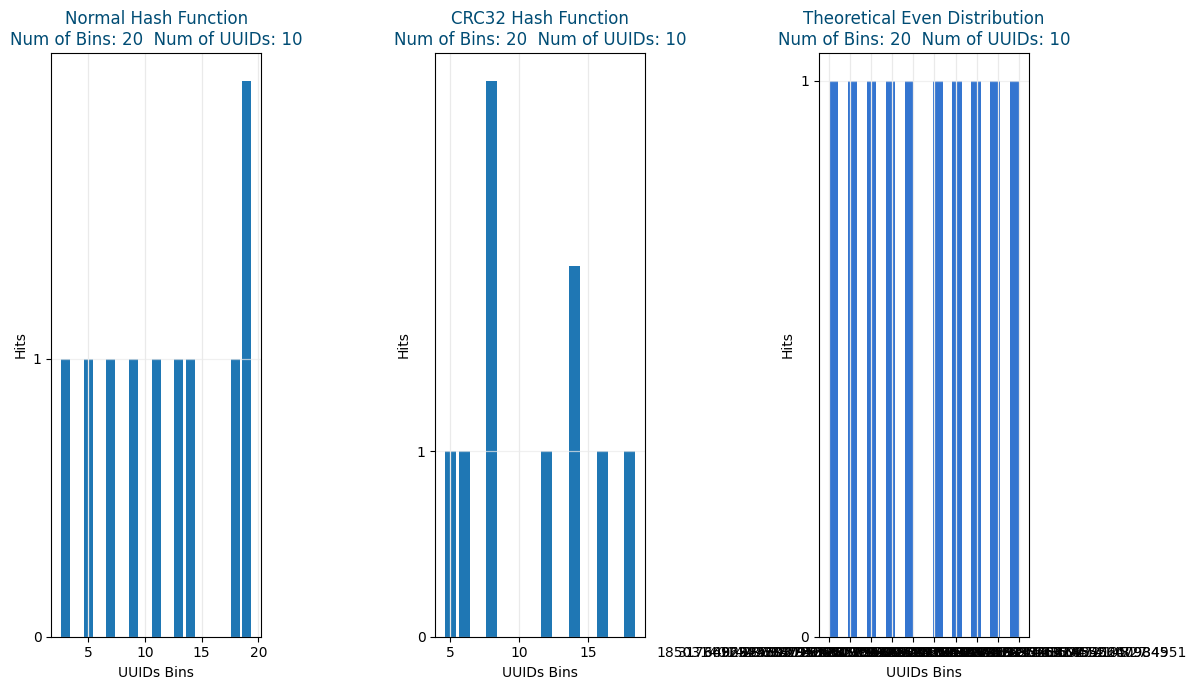

Test case number: 2


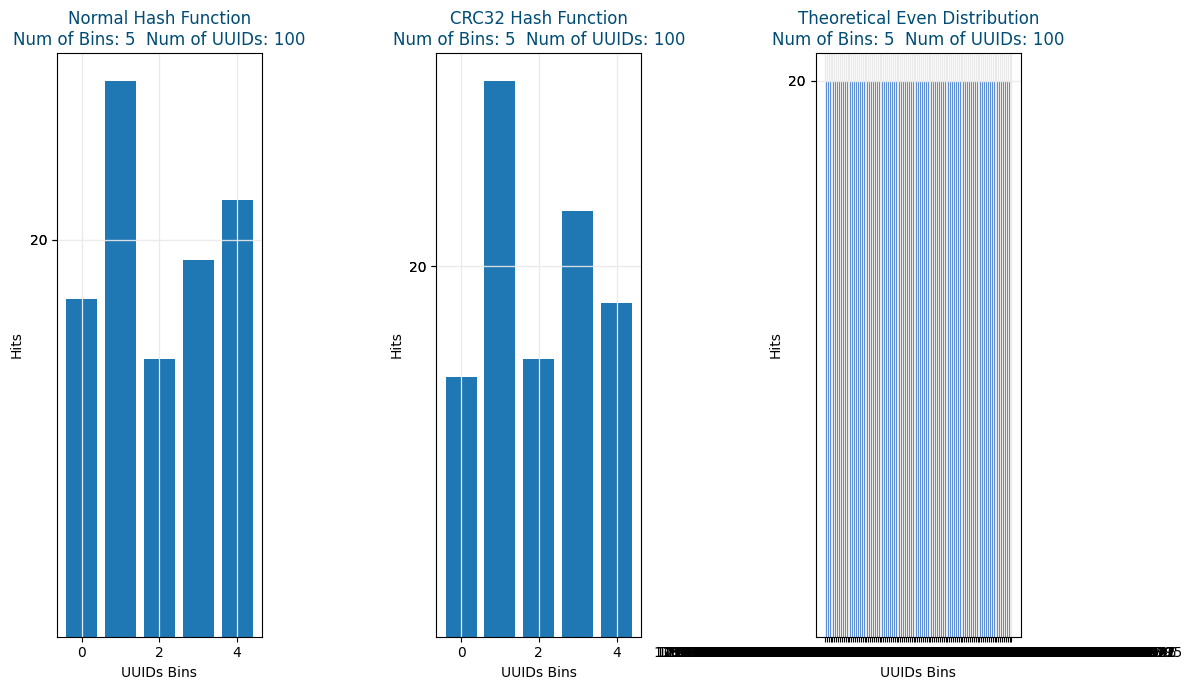

Test case number: 2


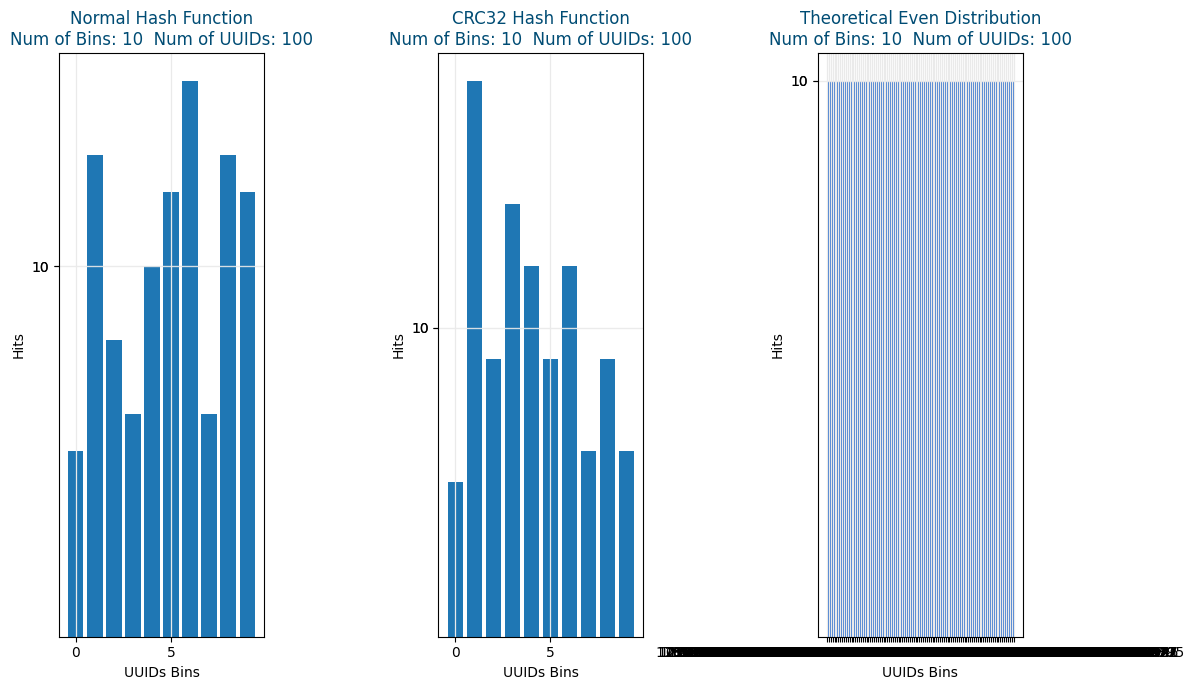

Test case number: 2


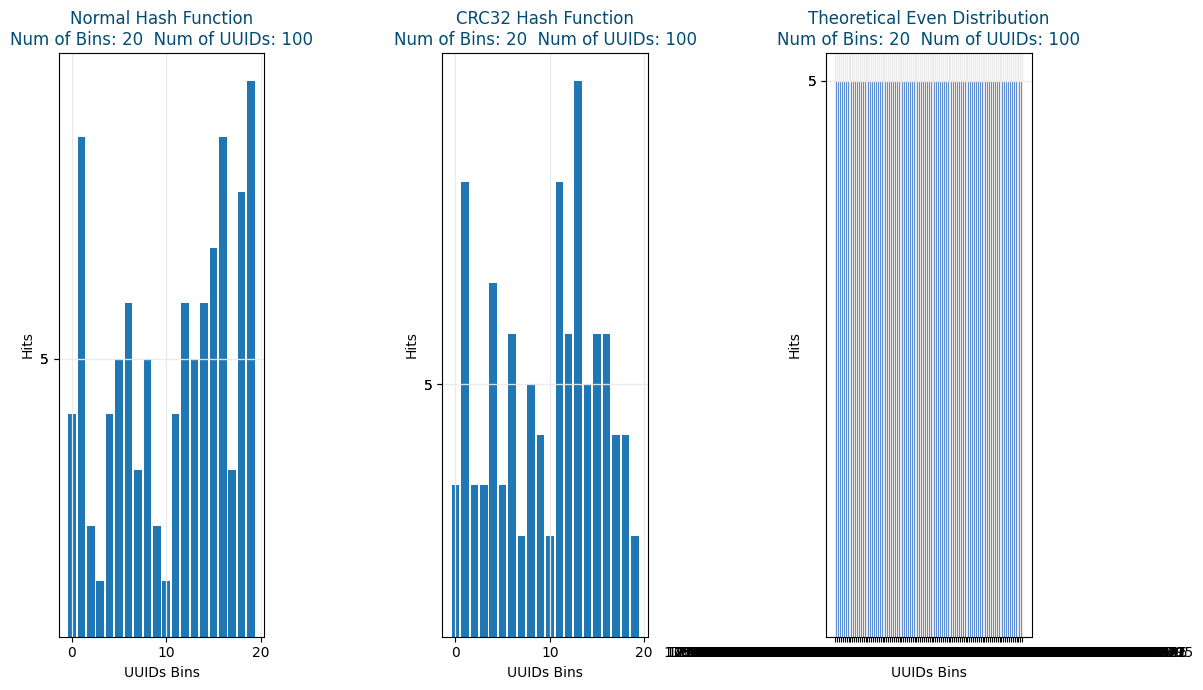

Test case number: 3


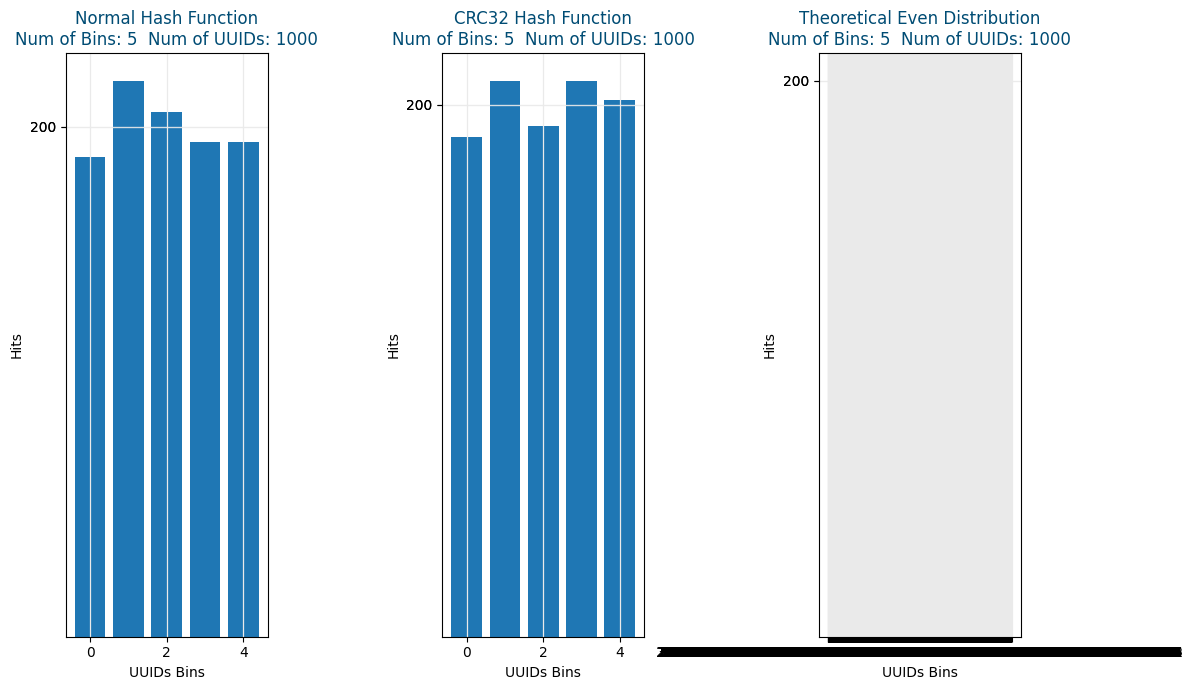

Test case number: 3


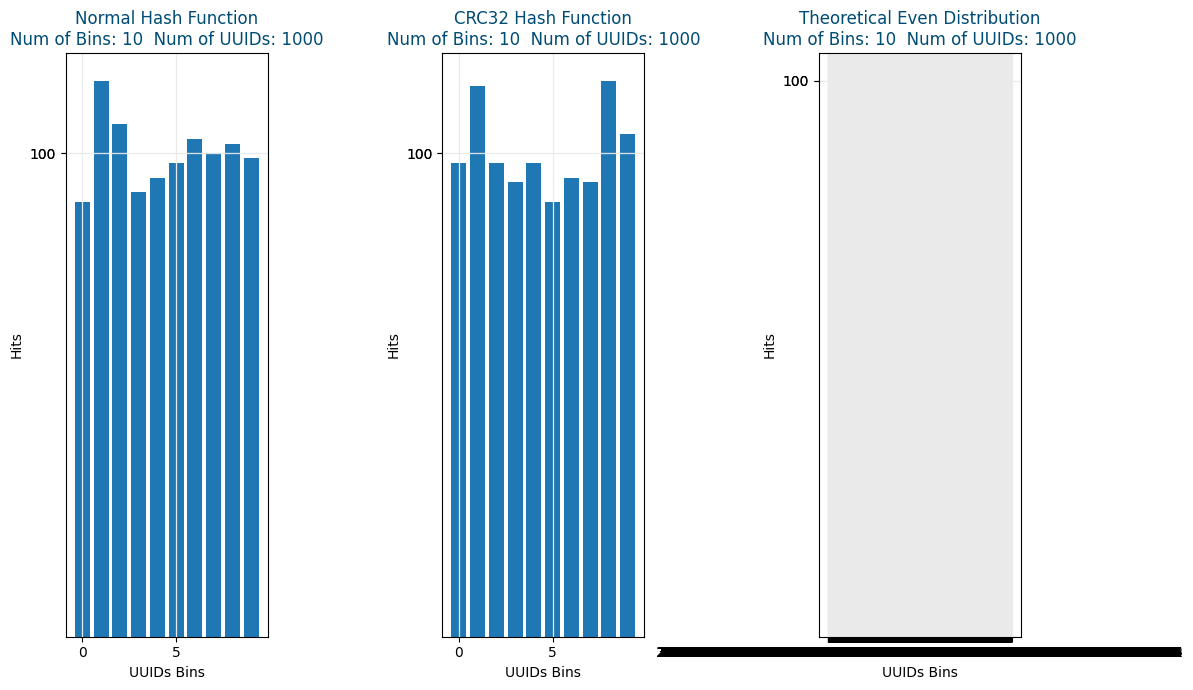

Test case number: 3


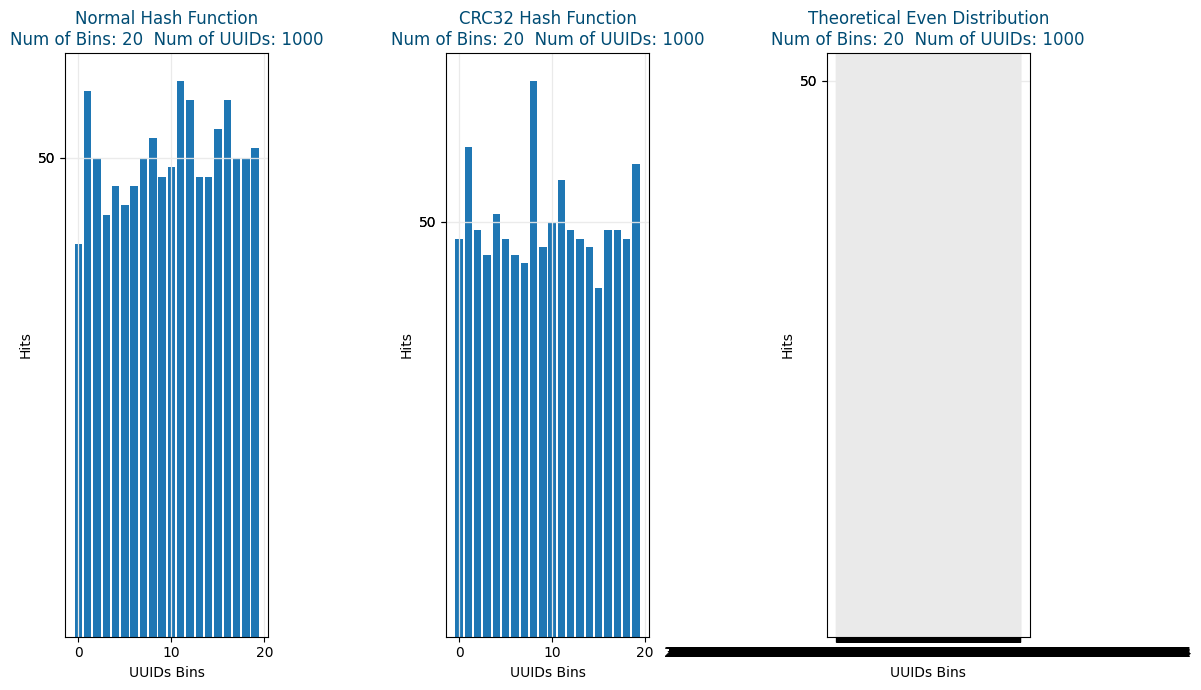

In [314]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
color_bars2 = '#5596E1'
txt_color1 = '#252525'
txt_color2 = '#004C74'

print("Python hash function results for random UUIDs")
counter = 0
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        counter+=1
        title = f"Num of Bins: {bin_size}  Num of UUIDs: {len(val)}"
        print(f"Test case #{counter} - {title}")

        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))

        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), tight_layout=True)

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values())

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values())

        # Histogram even distribution
        c, b, _ = axs[2].hist(val, bins=bin_size, color=color_bars)

        for ax in axs:
            ax.grid(axis='y', color=facecolor, lw = 0.9, alpha=0.7)
            ax.grid(axis='x', color=facecolor, lw = 0.9)
            ax.grid(True)
            ax.set_ylabel('Hits')
            ax.set_yticks([min(c),max(c)])

        ax = axs[0]
        ax.set_title(f"Normal Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        #ax.tick_params(axis='x', rotation=55)
        ax = axs[1]
        ax.set_title(f"CRC32 Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        ax = axs[2]
        ax.set_title(f"Theoretical Even Distribution\n{title}", c=txt_color2)
        #ax.set_xticklabels()
        ax.set_xlabel("UUIDs Bins")
        plt.show()

In [304]:
# Test cases
test_cases = [
[str(uuid.uuid4().int) for i in range(100)],   # 100 users
[str(uuid.uuid4().int) for i in range(10000)], # 10k users (client estimation)
[str(uuid.uuid4().int) for i in range(23639)]  # 24k users (our estimation)
]

# Up to 10% of MAUs as bins
num_bins = [5, 10, 50, 100, 850]

# Plot Normal hash function
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case #{idx}  Number of Bins: {bin_size}  Number of Elements: {len(val)}")
        plot(distribute(val, num_containers=bin_size))  

print("Python crc32 function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        print(f"Case {idx}: Number of Bins: {bin_size}")
        plot(distribute(val, num_containers=bin_size, hash_function=my_hash_function))  


Python hash function results for random UUIDs
Case #0  Number of Bins: 5  Number of Elements: 100
  0 ■■■■■■■■■■■■■■■■■■■    (19)
  1 ■■■■■■■■■■■■■■■■■■     (18)
  2 ■■■■■■■■■■■■■■■■■■■■■■ (22)
  3 ■■■■■■■■■■■■■■■■■■■    (19)
  4 ■■■■■■■■■■■■■■■■■■■■■■ (22)
Case #0  Number of Bins: 10  Number of Elements: 100
  0 ■■■■■■■■■■■     (11)
  1 ■■■■■■■         (7)
  2 ■■■■■■■■■■■■    (12)
  3 ■■■■■■■         (7)
  4 ■■■■■■■         (7)
  5 ■■■■■■■■        (8)
  6 ■■■■■■■■■■■     (11)
  7 ■■■■■■■■■■      (10)
  8 ■■■■■■■■■■■■    (12)
  9 ■■■■■■■■■■■■■■■ (15)
Case #0  Number of Bins: 50  Number of Elements: 100
  1 ■■■    (3)
  2 ■      (1)
  3 ■      (1)
  4 ■■     (2)
  5 ■■     (2)
  6 ■      (1)
  7 ■■■    (3)
  8 ■■■    (3)
  9 ■■■    (3)
 10 ■      (1)
 11 ■      (1)
 12 ■■■■■  (5)
 15 ■      (1)
 16 ■■     (2)
 17 ■■     (2)
 18 ■■     (2)
 19 ■■     (2)
 20 ■■     (2)
 21 ■■     (2)
 22 ■■■    (3)
 23 ■      (1)
 24 ■      (1)
 25 ■      (1)
 26 ■■■    (3)
 28 ■■■    (3)
 29 ■■■■   (4)


Python hash function results for random UUIDs


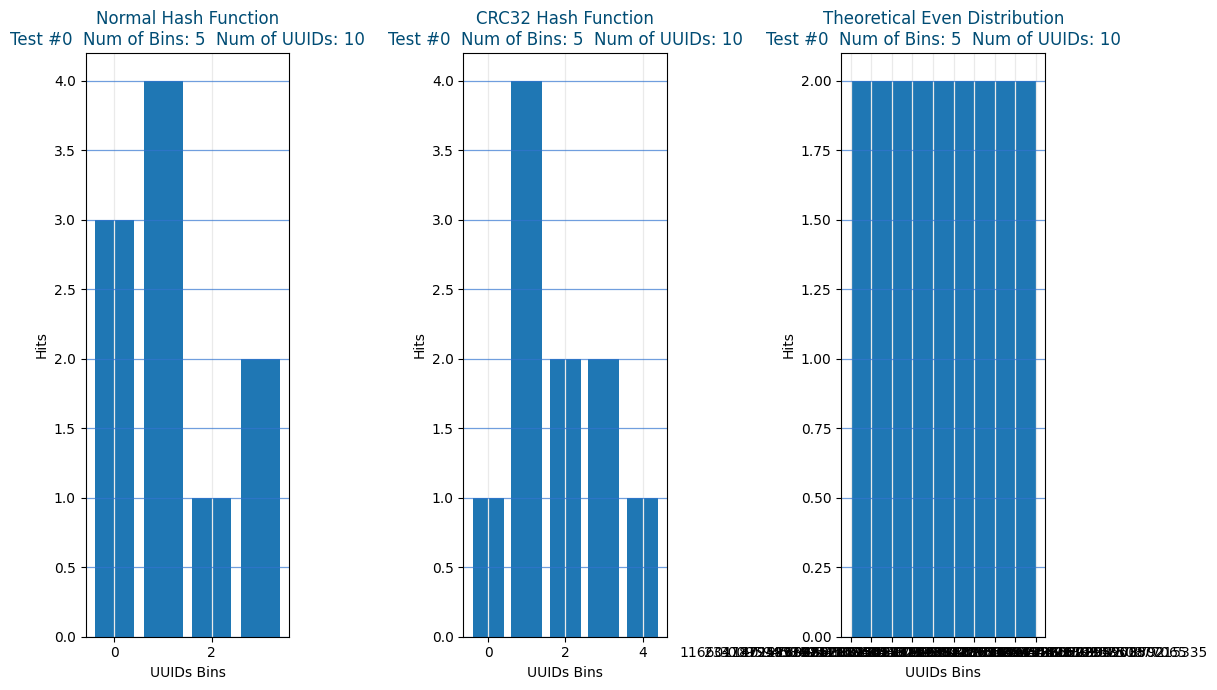

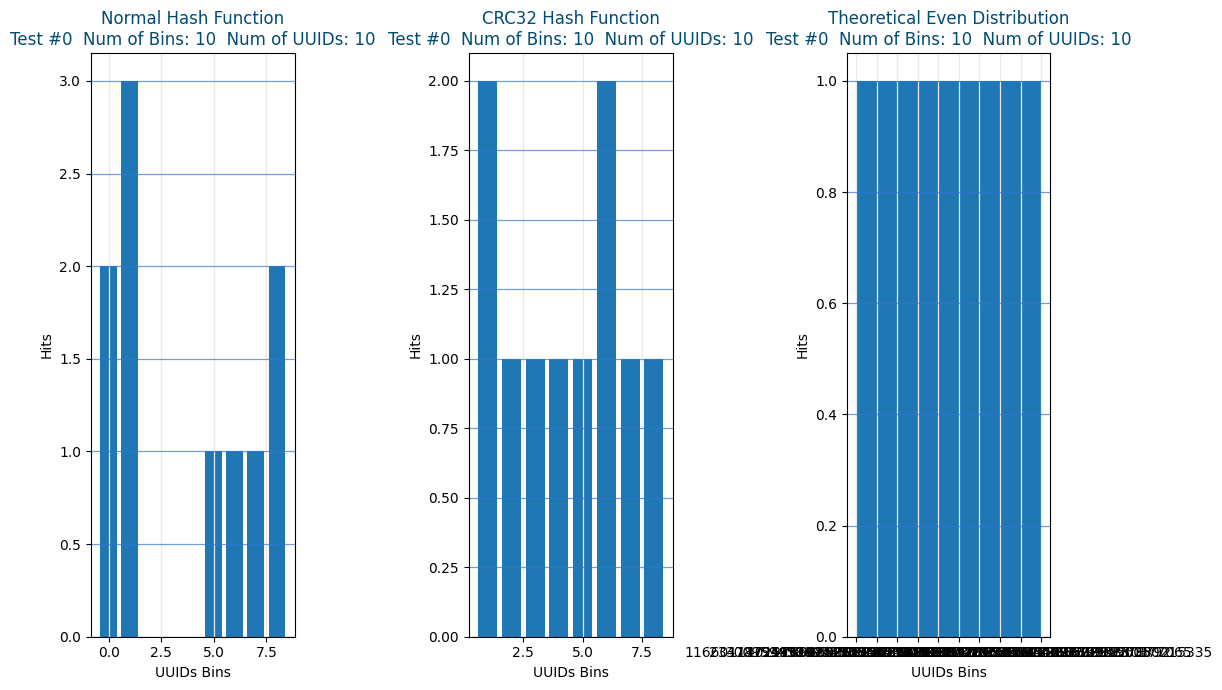

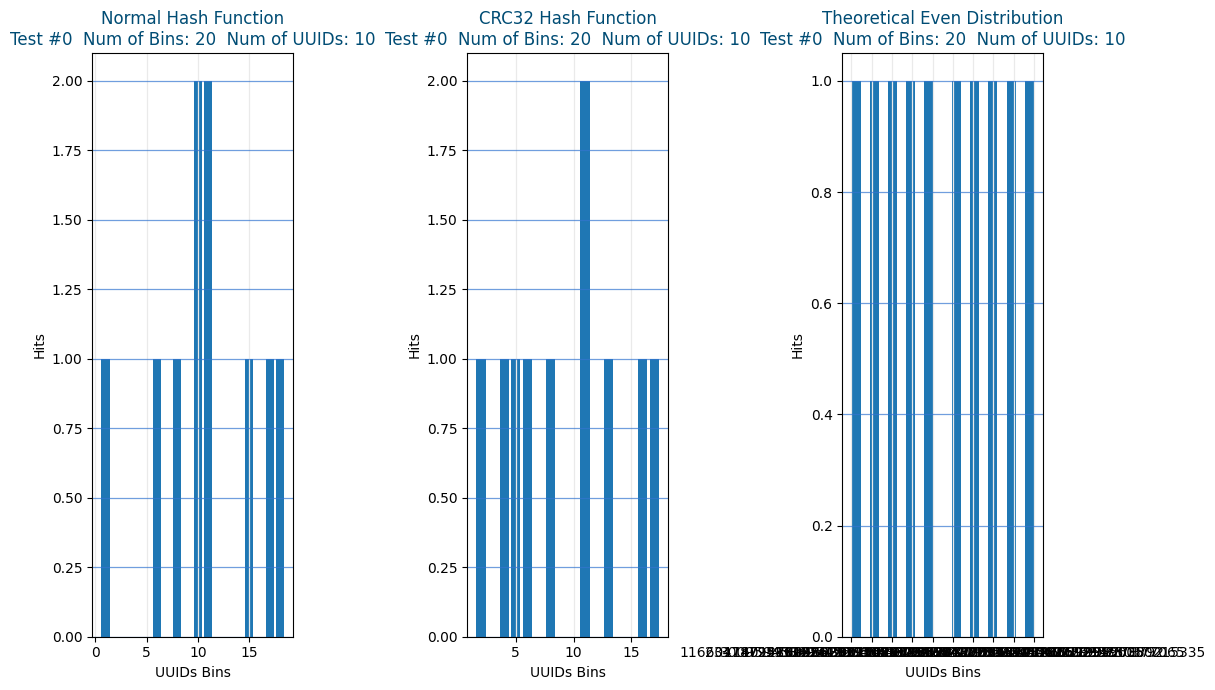

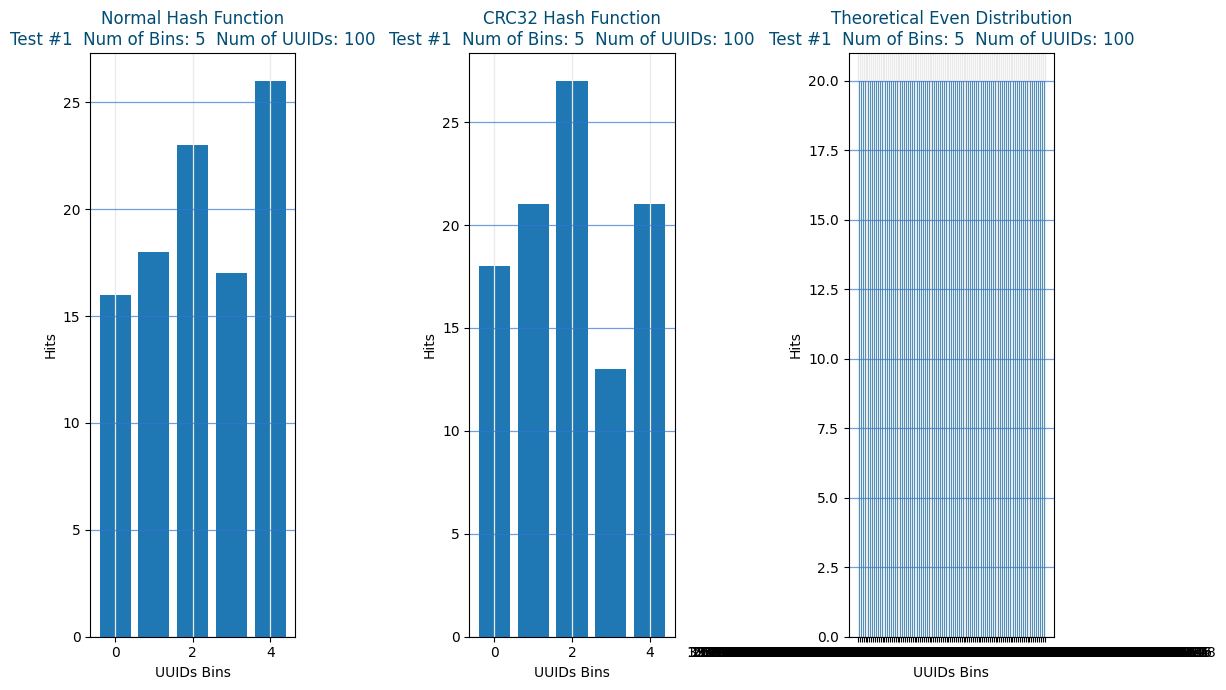

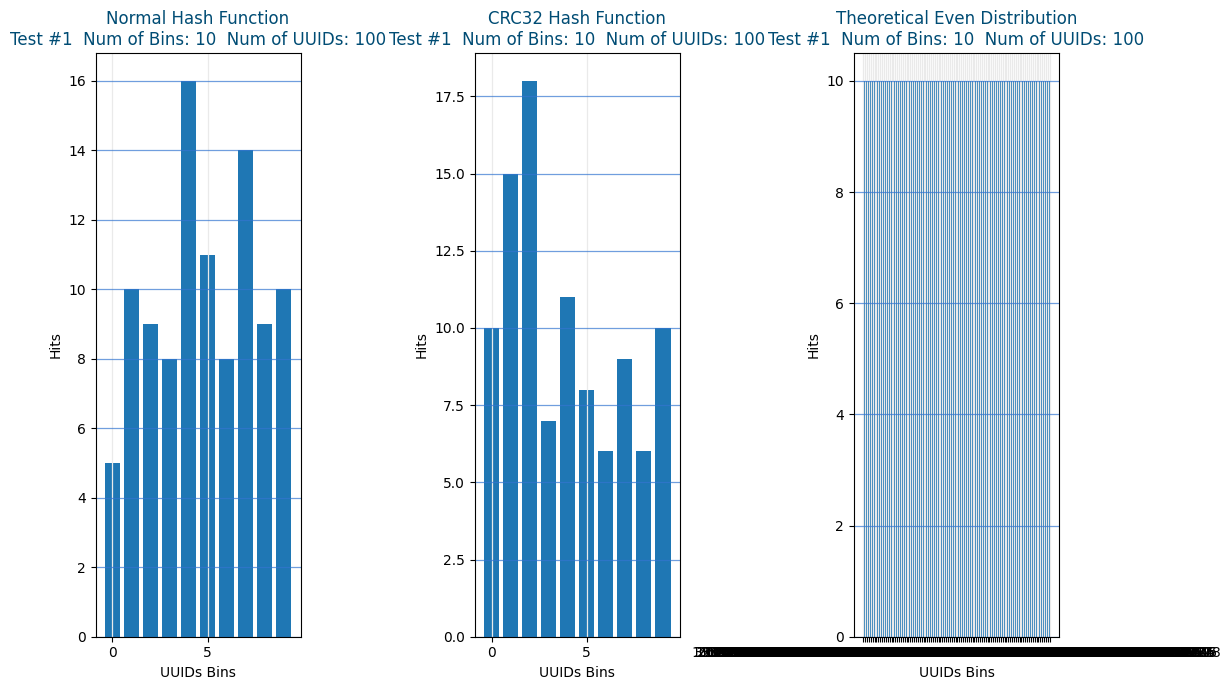

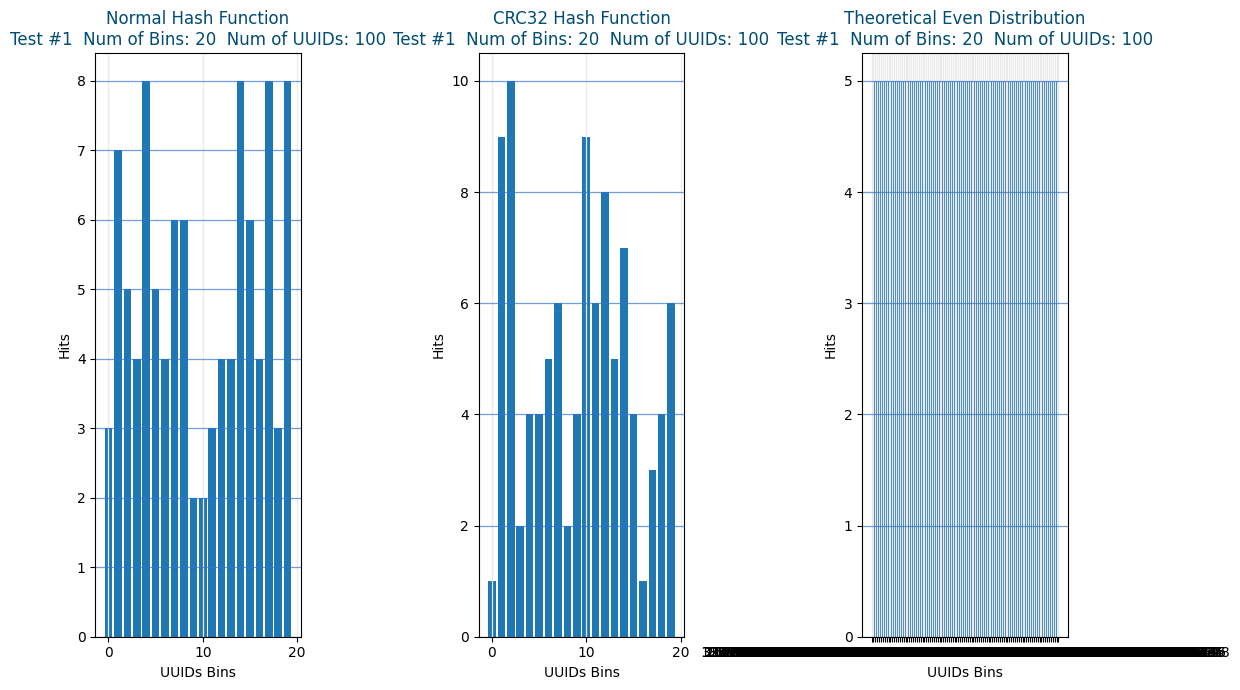

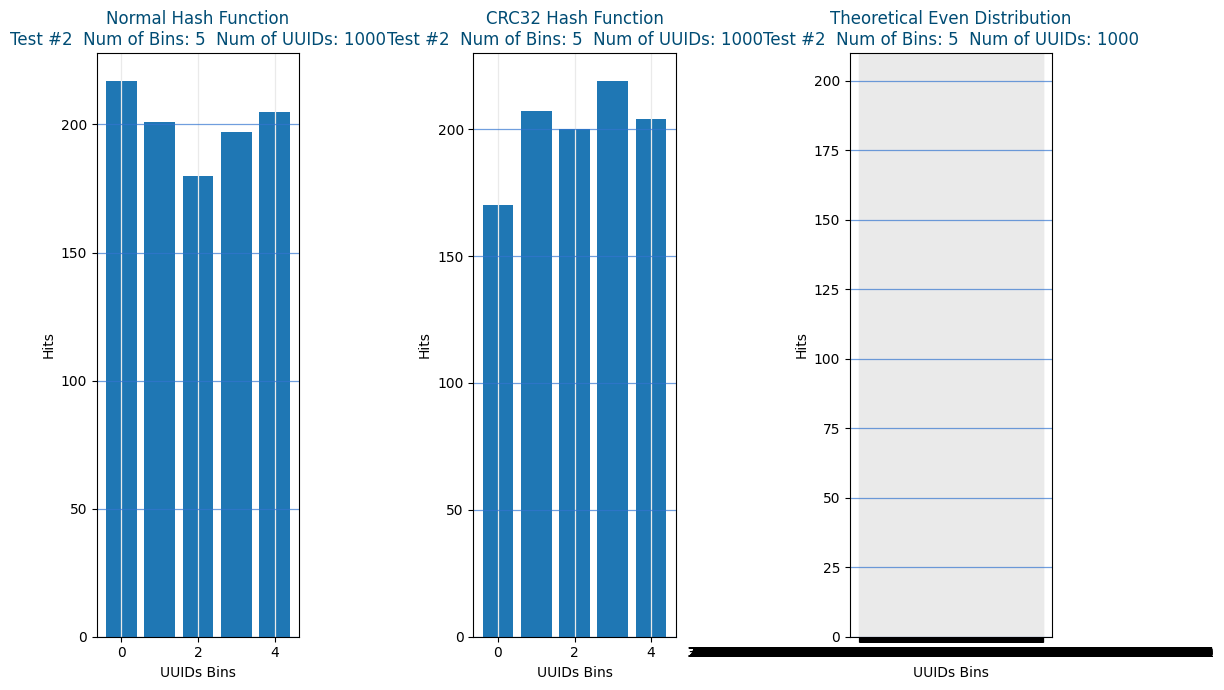

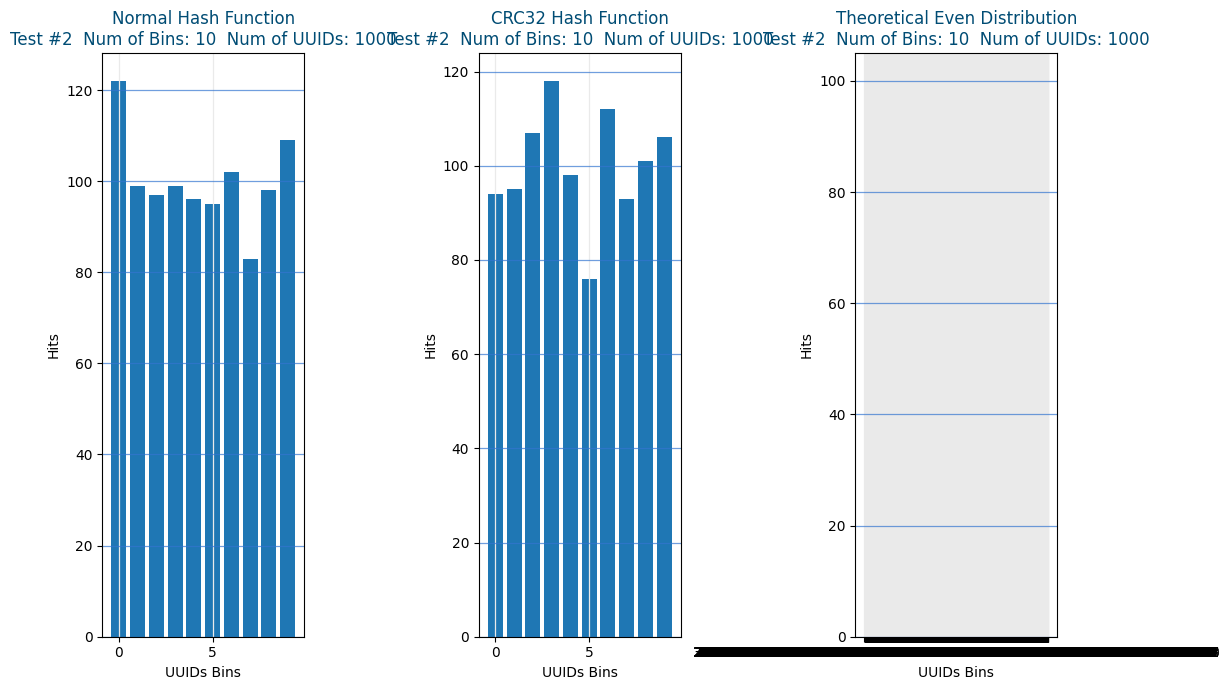

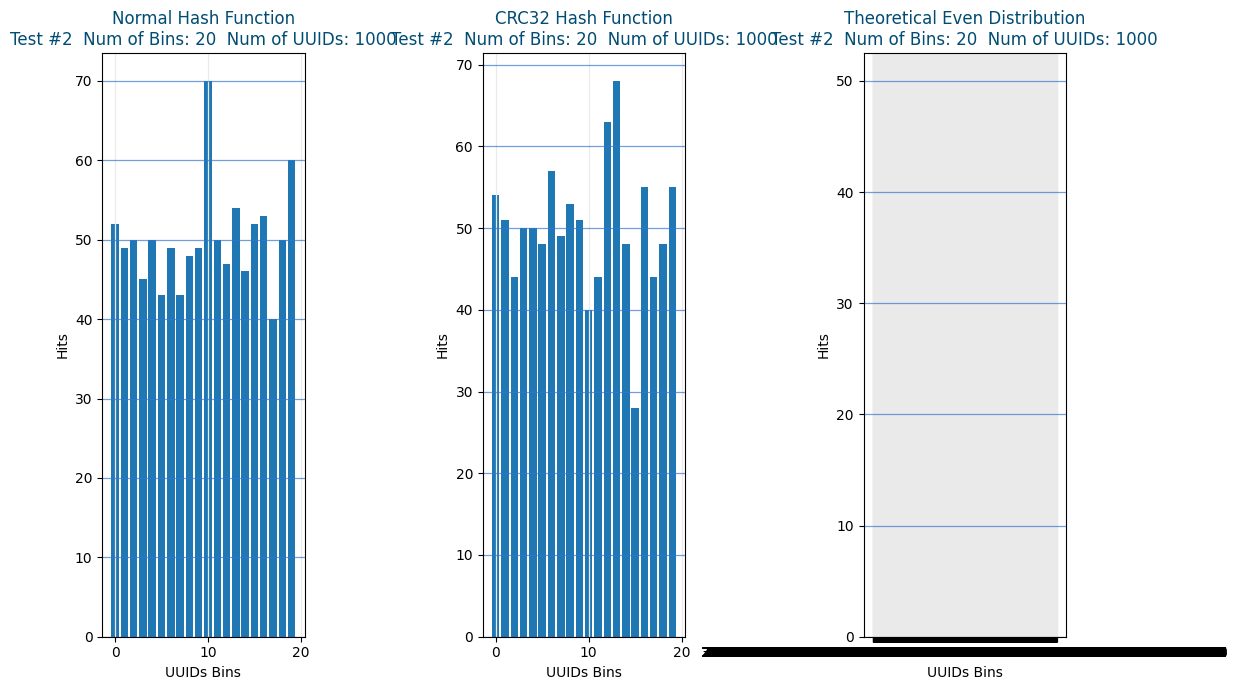

In [298]:
print("Python hash function results for random UUIDs")
for idx, val in enumerate(test_cases):
    for bin_size in num_bins:
        # Generate Counts with each hash function
        normal_hash_counts = (distribute(val, num_containers=bin_size))
        crc32_hash_counts = (distribute(val, num_containers=bin_size, hash_function=crc32_hash_function))

        #hex_val = [to_hex(crc32_hash_function(str(i))) for i in val]  # Convert to hexadecimal
        
        # Create 3 charts
        fig, axs = plt.subplots(1, 3, figsize=(12, 7), tight_layout=True)

        # Bar normal hash function
        axs[0].bar(normal_hash_counts.keys(), normal_hash_counts.values())

        # Bar count hash function
        axs[1].bar(crc32_hash_counts.keys(), crc32_hash_counts.values())

        # Histogram even distribution
        c, b, _ = axs[2].hist(val, bins=bin_size)

        for ax in axs:
            ax.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
            ax.grid(axis='x', color=facecolor, lw = 0.9)
            ax.grid(True)
            ax.set_ylabel('Hits')

        title = f"Test #{idx}  Num of Bins: {bin_size}  Num of UUIDs: {len(val)}"
        ax = axs[0]
        ax.set_title(f"Normal Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        #ax.tick_params(axis='x', rotation=55)
        ax = axs[1]
        ax.set_title(f"CRC32 Hash Function\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        ax = axs[2]
        ax.set_title(f"Theoretical Even Distribution\n{title}", c=txt_color2)
        ax.set_xlabel("UUIDs Bins")
        plt.show()

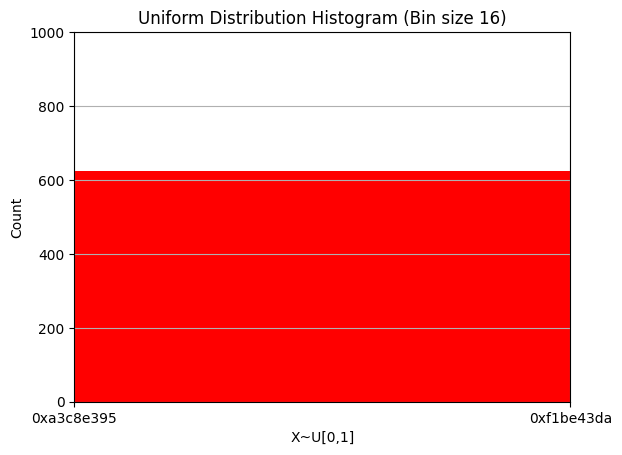

In [56]:

# Using 16 UUIDs
count, bins, ignored = plt.hist(client_hash, 16, facecolor='blue') 
plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 16)")
plt.axis([0, 1, 0, 1000])
#plt.axis(["","#ffffff", 0, 10])
plt.grid(True)

plt.show(block = False)

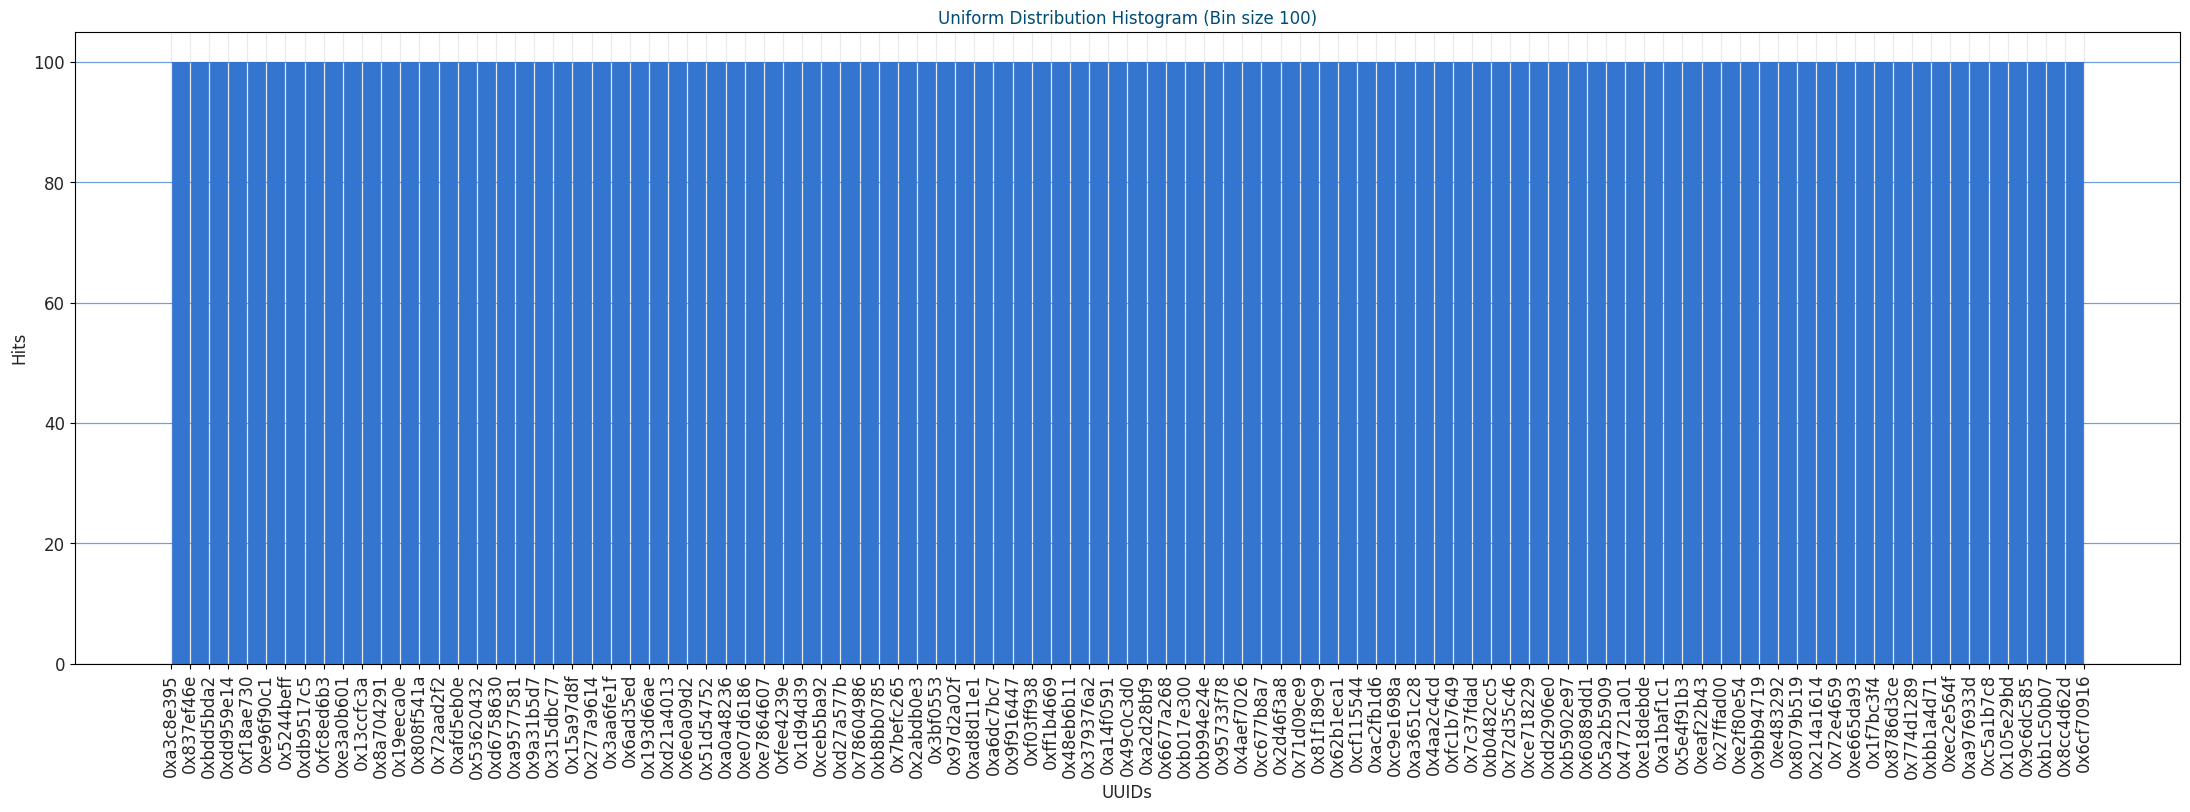

In [84]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'

# How many UUID's are we going to allow the user
# to connect to at the same time.
allowed_uuids = 100  # binsize

# plot it
fig = plt.figure(figsize=(22,8))
n, bins, patches = plt.hist(client_hash, bins=allowed_uuids, color=color_bars)

plt.xlabel('UUIDs', fontsize=12, c=txt_color1)
plt.ylabel('Hits', fontsize=12, c=txt_color1)
#plt.axis([0, 1, 0, 1000])
#plt.grid(True)

plt.xticks(bins, c=txt_color1, fontsize=12, rotation='vertical')
plt.yticks(c=txt_color1, fontsize=12)
plt.grid(axis='y', color=color_bars, lw = 0.9, alpha=0.7)
plt.grid(axis='x', color=facecolor, lw = 0.9)

#remove major and minor ticks from the x axis, but keep the labels
#ax.tick_params(axis='both', which='both',length=0)
# Hide the right and top spines
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_position(('outward', 10))

#plt.axis([0, 1, 0, 1000])
plt.tight_layout()
plt.title(f"Uniform Distribution Histogram (Bin size {allowed_uuids})", c=txt_color2)
plt.show(block = False)
#plt.savefig('hist.png', facecolor=facecolor)

([<matplotlib.axis.XTick at 0x29fd79210>,
 [Text(0.0, 0, '0x5d7f9005'),
  Text(1.98, 0, '0xb72c8de0'),
  Text(3.96, 0, '0x51d66446'),
  Text(5.9399999999999995, 0, '0xfca78677'),
  Text(7.92, 0, '0xda02be1a'),
  Text(9.9, 0, '0x8ff95ef6'),
  Text(11.879999999999999, 0, '0x77ba51f8'),
  Text(13.86, 0, '0x9c37526d'),
  Text(15.84, 0, '0xdd4d7267'),
  Text(17.82, 0, '0xd09eaefd'),
  Text(19.8, 0, '0x6e4baa6d'),
  Text(21.78, 0, '0x3efd2dca'),
  Text(23.759999999999998, 0, '0xb530252b'),
  Text(25.74, 0, '0x4482d984'),
  Text(27.72, 0, '0xa364f95a'),
  Text(29.7, 0, '0x3372abd3'),
  Text(31.68, 0, '0x17a1b1bf'),
  Text(33.66, 0, '0x125186dc'),
  Text(35.64, 0, '0x7f4c6aee'),
  Text(37.62, 0, '0x191fcde'),
  Text(39.6, 0, '0xb44ca066'),
  Text(41.58, 0, '0x3a8538e8'),
  Text(43.56, 0, '0x36fc3024'),
  Text(45.54, 0, '0x23143f78'),
  Text(47.519999999999996, 0, '0xb1fde7d2'),
  Text(49.5, 0, '0x2c0005a'),
  Text(51.48, 0, '0x13527d04'),
  Text(53.46, 0, '0x600f31ae'),
  Text(55.44, 0, '0x316

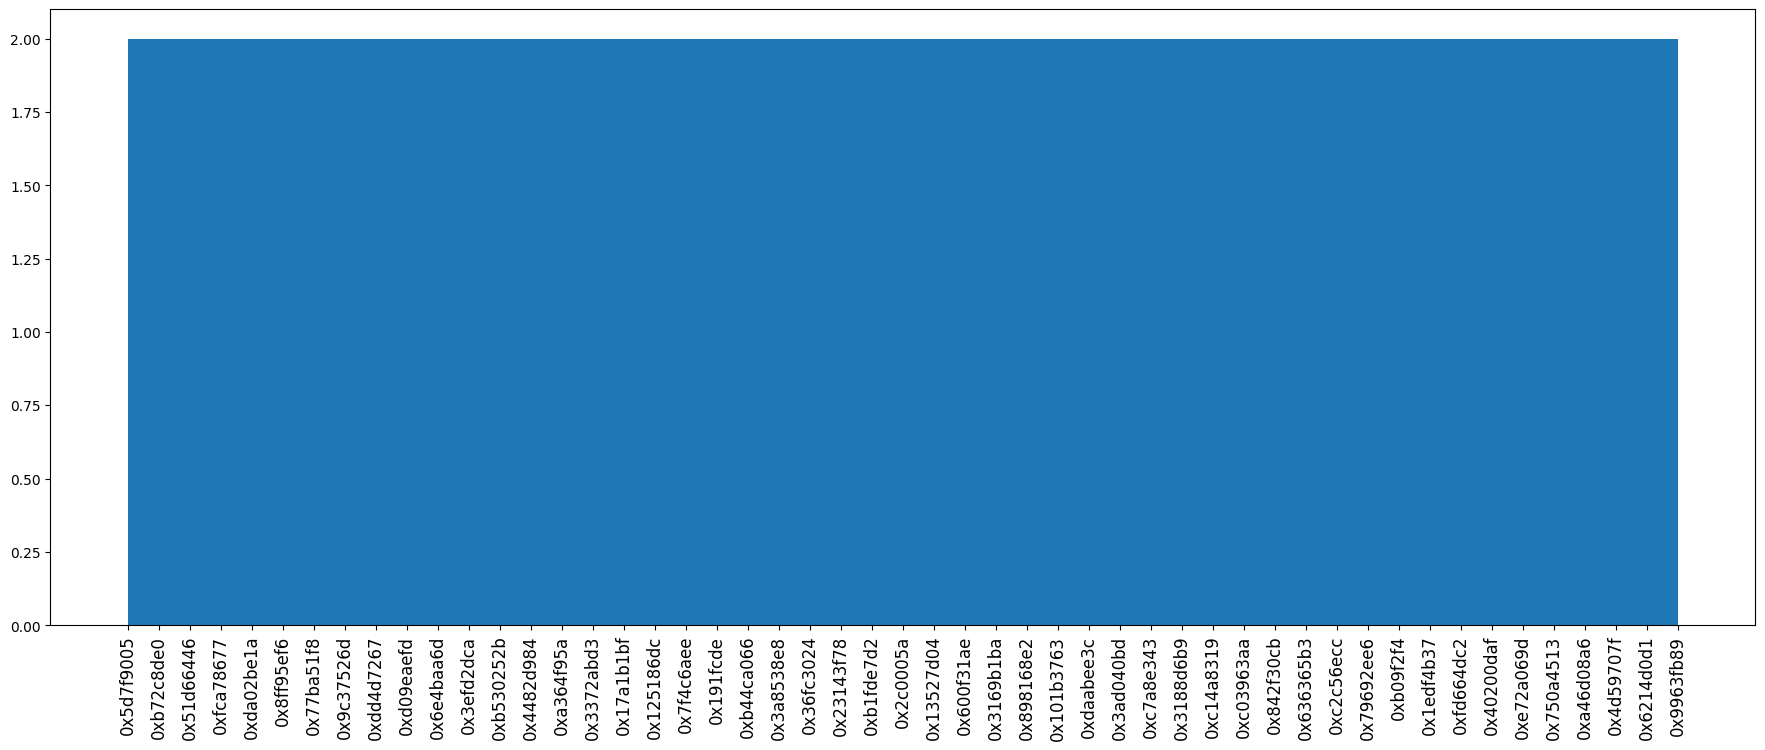

In [187]:
import numpy as np

NUM_EXAMPLES = 10000
SEQ_LENGTH = 10

fig = plt.figure(figsize=(22,8))
hc, hb, _ = plt.hist(test_hash, bins=50, histtype='bar')
plt.xticks(hb, fontsize=12, rotation='vertical')

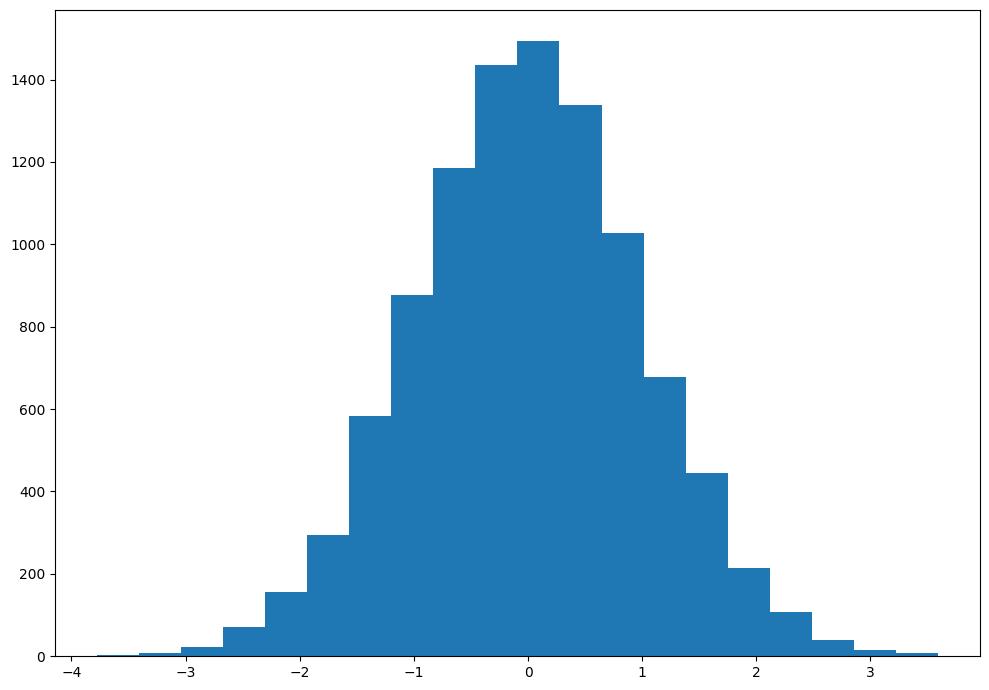

In [83]:
# Creating dataset
np.random.seed(23685752)
N_points = 10000
n_bins = 20
 
# Creating distribution
x = np.random.randn(N_points)
y = .8 ** x + np.random.randn(10000) + 25
 
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
 
# Show plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(0,1000,1000) # You are generating 1000 points between 0 and 1000.
count, bins, ignored = plt.hist(data, 100, facecolor='green') 

plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Uniform Distribution Histogram (Bin size 100)")
plt.axis([0, 1000, 0, 50]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)

In [ ]:
# Hashing UUIDs
import zlib

# Create Hash Function
def hash_function(user_id):
    encoded = bytes(user_id, encoding='ascii')
    return hex(zlib.crc32(encoded) & 0xffffffff)

# Test the function
user_id = "GUEST"
uuid_hash = hash_function(user_id)
test_hash = hex(zlib.crc32(b'GUEST') & 0xffffffff)
assert(test_hash == uuid_hash)